# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load dataset,Data preprocessing

In [2]:
data = pd.read_excel('oasis_longitudinal_demographics.xlsx')  
X = data[['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['Group']  
y = y.apply(lambda x: 'Demented' if x in ['Demented', 'Converted'] else 'Not Demented')
imputer = SimpleImputer(strategy='mean')

 # Train a machine learning model (Support Vector Machine)

In [3]:
X = imputer.fit_transform(X)
model = SVC(kernel='linear',  random_state=42,C=4)
model.fit(X, y)
y_pred = model.predict(X)
data['Result'] = y_pred

# Evaluate the model

In [4]:
data.to_excel('output_svm_full_details.xlsx', index=False)
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred, target_names=['Not Demented', 'Demented'], output_dict=True)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8042895442359249
Classification Report:
 {'Not Demented': {'precision': 0.8666666666666667, 'recall': 0.7103825136612022, 'f1-score': 0.7807807807807808, 'support': 183.0}, 'Demented': {'precision': 0.7623318385650224, 'recall': 0.8947368421052632, 'f1-score': 0.8232445520581113, 'support': 190.0}, 'accuracy': 0.8042895442359249, 'macro avg': {'precision': 0.8144992526158445, 'recall': 0.8025596778832327, 'f1-score': 0.802012666419446, 'support': 373.0}, 'weighted avg': {'precision': 0.8135202394835236, 'recall': 0.8042895442359249, 'f1-score': 0.80241112003733, 'support': 373.0}}


# Graphs

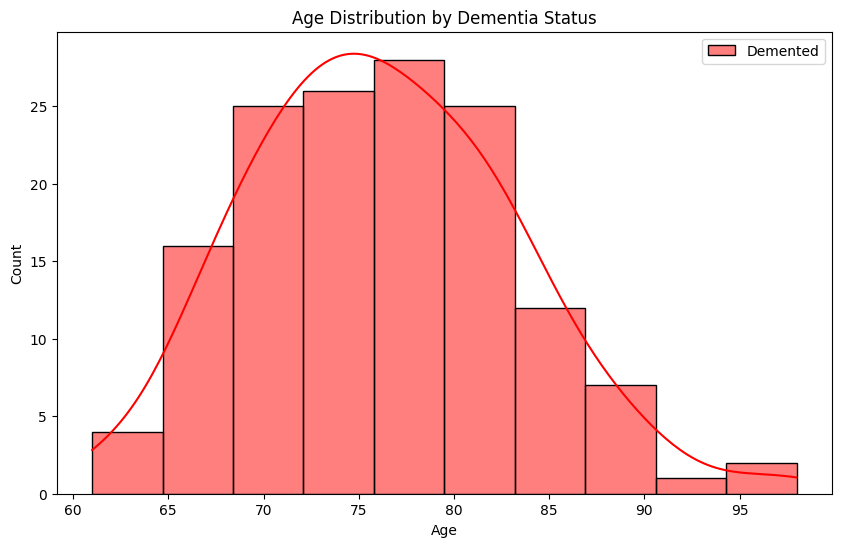

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['Group'] == 'Demented']['Age'], color='red', label='Demented', kde=True)
sns.histplot(data=data[data['Group'] == 'Not Demented']['Age'], color='blue', label='Not Demented', kde=True)
plt.title('Age Distribution by Dementia Status')
plt.xlabel('Age')
plt.legend()
plt.show()


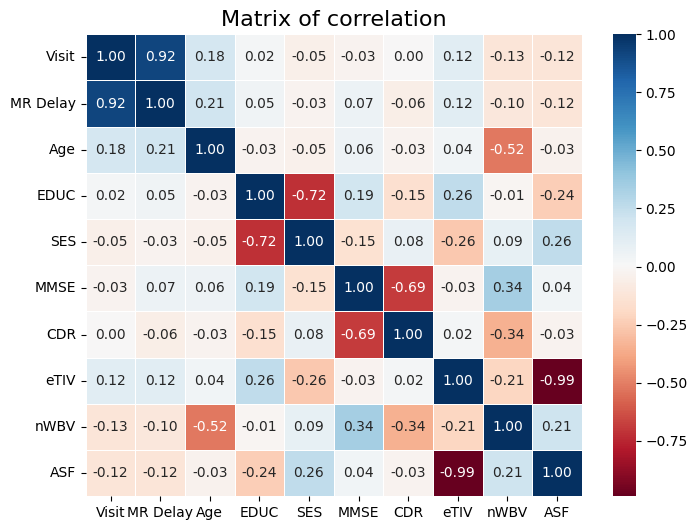

In [6]:
corr = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar=True, cmap='RdBu')
plt.title('Matrix of correlation', size=16)
plt.show()

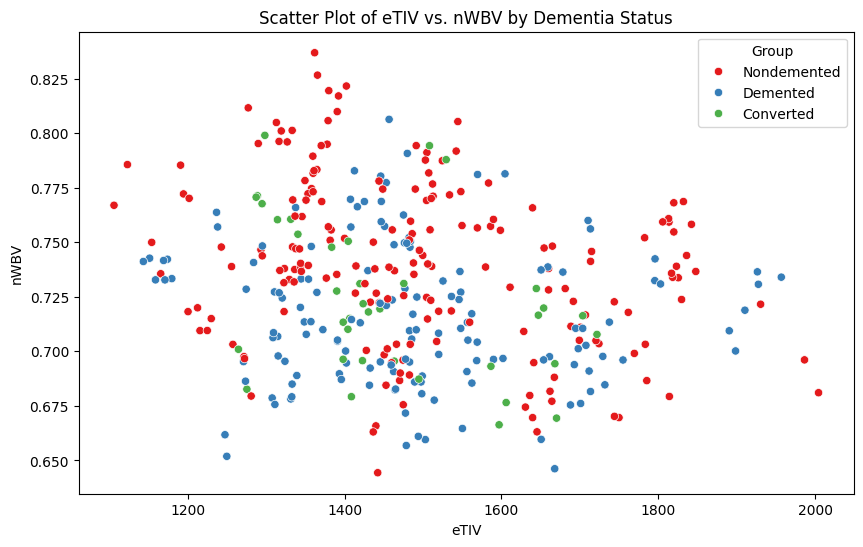

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='eTIV', y='nWBV', hue='Group', palette='Set1')
plt.title('Scatter Plot of eTIV vs. nWBV by Dementia Status')
plt.xlabel('eTIV')
plt.ylabel('nWBV')
plt.show()

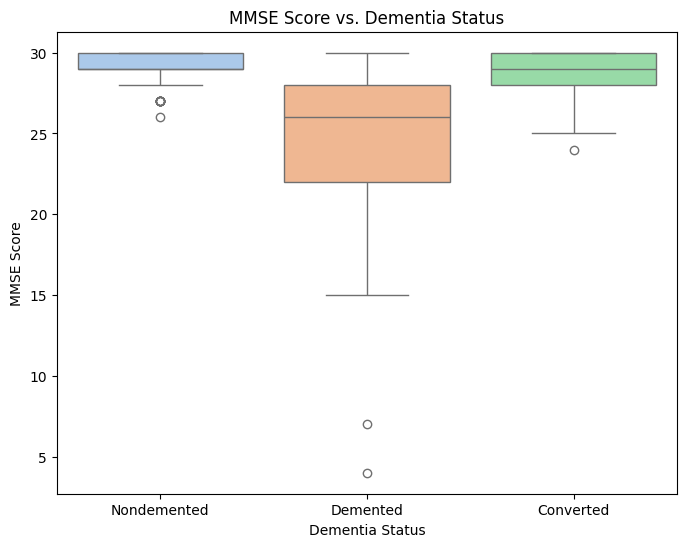

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Group', y='MMSE', palette='pastel', hue='Group', legend=False)
plt.title('MMSE Score vs. Dementia Status')
plt.xlabel('Dementia Status')
plt.ylabel('MMSE Score')
plt.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Demented', 'Demented'], yticklabels=['Not Demented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming 'data' contains your features and target variable
# Separate features (X) and target variable (y)
X = data.drop(columns=['Result'])  # Assuming 'Result' is the target variable
y = data['Result']

# Impute missing values in your features
imputer = SimpleImputer()
imputer = SimpleImputer()
X = imputer.fit_transform(X)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Classifier
model = SVC(kernel='linear', random_state=42, C=4)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Demented', 'Demented'], yticklabels=['Not Demented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()